# 动手学Python地理数据分析

## 一，shapely几何操作

shapely是python中开源的几何对象库，支持Point(点)，LineString(线)，Polygon(面)等几何对象及相关空间操作。

实践证明，它的以下一些功能特性非常常用：

* 可以和numpy.array互相转换。

* 可以轻松求线的长度(length)，面的面积（area)，对象之间的距离(distance),最小最大距离(hausdorff_distance)。

* 可以轻松求几何对象之间的关系：相交(intersect)，包含(contain)，求相交区域(intersection)等。

* 可以轻松对几何对象求几何中心(centroid),缓冲区(buffer),最小旋转外接矩形(minimum_rotated_rectangle)等。

* 可以求线的插值点(interpolate),可以求点投影到线的距离(project),可以求几何对象之间对应的最近点(nearestPoint)

* 可以轻松对几何对象进行旋转(rotate)和缩放(scale)。


In [1]:
from shapely import geometry as geo
from shapely import wkt 
from shapely import ops
import numpy as np 


**1，Point**

POINT (0 0)
POINT (0 1)
POINT (1 1)


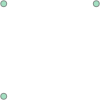

In [2]:
# 创建Point对象
pt1 = geo.Point([0,0])
print(pt1) 
coord = np.array([0,1])
pt2 = geo.Point(coord)
print(pt2)
pt3 = wkt.loads("POINT(1 1)")
print(pt3)

#批量可视化
geo.GeometryCollection([pt1,pt2,pt3])

In [3]:
# 常用属性

print(pt1.x) 
print(pt1.y)
print(list(pt1.coords))  
print(np.array(pt1)) #可以和np.array互转


0.0
0.0
[(0.0, 0.0)]
[0. 0.]


In [4]:
# 常用方法

d = pt2.distance(pt1)
print(d)



1.0


**2, LineString**

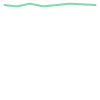

In [5]:
# 创建LineString对象
line1 = geo.LineString([(0,0),(1,-0.1),(2,0.1),(3,-0.1),(5,0.1),(7,0)])
line1 

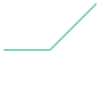

In [6]:
arr = np.array([(2,2),(3,2),(4,3)])
line2 = geo.LineString(arr)
line2 

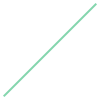

In [7]:
line3 = wkt.loads("LineString(-2 -2,4 4)")
line3 

In [8]:
# 常用属性
print(line2.length) 
print(list(line2.coords)) 
print(np.array(line2))  #可以和np.array互转
print(line2.bounds) #坐标范围

2.414213562373095
[(2.0, 2.0), (3.0, 2.0), (4.0, 3.0)]
[[2. 2.]
 [3. 2.]
 [4. 3.]]
(2.0, 2.0, 4.0, 3.0)


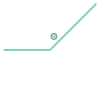

In [9]:
center = line2.centroid #质心
geo.GeometryCollection([line2,center])

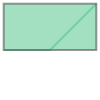

In [10]:
bbox = line2.envelope #最小外接矩形
geo.GeometryCollection([line2,bbox]) 

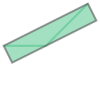

In [11]:
rect = line2.minimum_rotated_rectangle #最小旋转外接矩形
geo.GeometryCollection([line2,rect])

In [12]:
# 常用方法

d1 = line1.distance(line2) #线线距离
print(d1)
d2 = line1.distance(geo.Point([-1,0])) #线点距离
print(d2)
d3 = line1.hausdorff_distance(line2) #最小最大距离
print(d3)

1.9
1.0
4.242640687119285


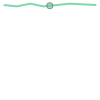

In [13]:
pt_half = line1.interpolate(0.5,normalized=True) #插值
geo.GeometryCollection([line1,pt_half])

In [14]:
ratio = line1.project(pt_half,normalized=True) #投影
print(ratio)

0.5


LINESTRING (0 0, 1 -0.1, 2 0.1, 3 -0.1, 5 0.1, 7 0)
LINESTRING (0 0, 7 0)


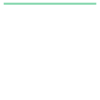

In [15]:
line1_simplify = line1.simplify(0.5)  #化简 DouglasPucker算法
print(line1)
print(line1_simplify)
line1_simplify 

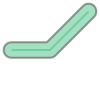

In [16]:
buffer_with_circle = line2.buffer(0.2)  #端点按照半圆扩展
geo.GeometryCollection([line2,buffer_with_circle])

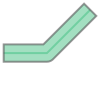

In [17]:
buffer_without_circle = line2.buffer(0.2,cap_style=2) #端点不扩展
geo.GeometryCollection([line2,buffer_without_circle])

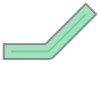

In [18]:
buffer_with_square = line2.buffer(0.2,cap_style=3) #端点按照方形扩展
geo.GeometryCollection([line2,buffer_with_square])

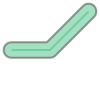

In [19]:
buffer_round_join = line2.buffer(0.2,join_style=1) #圆弧连接
geo.GeometryCollection([line2,buffer_round_join])

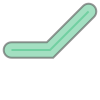

In [20]:
buffer_angle_join = line2.buffer(0.2,join_style=2) #折角连接
geo.GeometryCollection([line2,buffer_angle_join])

In [21]:
print(line2.intersects(line3)) #线线关系，是否相交
print(line2.intersection(line3)) #线线交点
print(line2.contains(geo.Point(2.5,2))) #点线关系

True
POINT (2 2)
True


**3，Polygon**



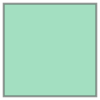

In [22]:
# 创建Polygon对象
poly1 = geo.Polygon([(0,0),(1,0),(1,1),(0,1),(0,0)]) #起点和终点相同
poly1


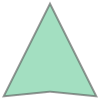

In [23]:
coords = np.array([(0,0),(1,0.1),(2,0),(1,2),(0,0)])
poly2 = geo.Polygon(coords)
poly2 

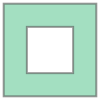

In [24]:
#第一个括号是外部坐标，后面的是内部空洞坐标
poly3 = wkt.loads("POLYGON((0 0,2 0,2 2,0 2,0 0),(0.5 0.5,1.5 0.5,1.5 1.5,0.5 1.5,0.5 0.5))")
poly3 


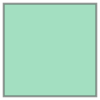

In [25]:
#从bbox创建polygon
poly4 = geo.Polygon.from_bounds(0,0,10,10)
poly4 

In [26]:
#常用属性
print(poly1.area)  #面积
print(poly1.length) #周长
print(np.array(poly1.exterior))  #外围坐标点
print(poly3.bounds) #坐标范围

1.0
4.0
[[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]]
(0.0, 0.0, 2.0, 2.0)


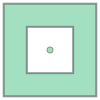

In [27]:
center = poly3.centroid #几何中心
geo.GeometryCollection([center,poly3]) 


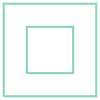

In [28]:
poly3.boundary #边缘

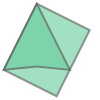

In [29]:

rect = poly2.minimum_rotated_rectangle #最小外接矩形
geo.GeometryCollection([rect,poly2])


In [30]:
# 常用方法
r1 = poly2.contains(geo.Point(0,0)) #面点关系
print(r1)

r2 = poly2.intersects(geo.LineString([(0,0),(5,5)])) #面线关系
print(r2)

r3 = poly2.intersects(poly3) #面面关系
print(r3)

False
True
True


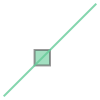

In [31]:
geo.GeometryCollection([poly1,line3])

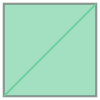

In [32]:
inter = poly1.intersection(line3) #面线交集
geo.GeometryCollection([poly1,inter])

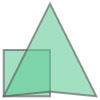

In [33]:
geo.GeometryCollection([poly1,poly2])

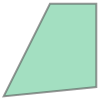

In [34]:
poly1.intersection(poly2) #面面交集

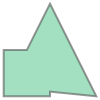

In [35]:
poly1.union(poly2) #面面并集

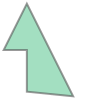

In [36]:
poly2.difference(poly1) #面面补集

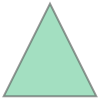

In [37]:
poly2.simplify(0.5) #简化

1.9
3.3218704710783897
0.8247437619385949


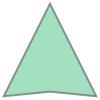

In [38]:
print(poly2.area)
poly2_bigger = poly2.buffer(0.2) #外扩面积变大
print(poly2_bigger.area)
poly2_smaller = poly2.buffer(-0.2) #内扩面积变小
print(poly2_smaller.area)
poly2_smaller 

**4，其他几何对象**

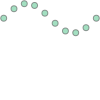

In [39]:
# MultiPoint 多点

x = np.linspace(0,2*np.pi,10)
y = np.sin(x)
points = [geo.Point(i,j) for i,j in zip(x,y)]
multipoints = geo.MultiPoint(points ) 
multipoints



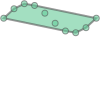

In [40]:
hull = multipoints.convex_hull  #凸包
geo.GeometryCollection([hull,multipoints]) 

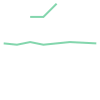

In [41]:
# MultiLineString 多线
multilines = geo.MultiLineString([line1,line2])
multilines 

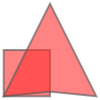

In [42]:
# MultiPolygon 多面

multipolys = geo.MultiPolygon([poly1,poly2])
multipolys 

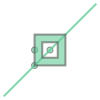

In [43]:
# GeometryCollection 对象集合

geoms = [pt1,pt2,pt3,line3,poly3]
geo.GeometryCollection(geoms) #方便在jupyter 中对多个几何对象可视化


**5，进阶操作** 

以下是一些非常有用但是不属于某个类的方法的函数。

* ops.nearest_points 求最近点

* ops.split 分割线

* ops.substring  求子串

* affinity.rotate 旋转几何体

* affinity.scale 缩放几何体

* affinity.translate 平移几何体


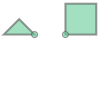

In [44]:
from shapely import ops,affinity 

poly1 = geo.Polygon([(0,0),(2,0),(1,1),(0,0)])
poly2 = geo.Polygon([(4,0),(6,0),(6,2),(4,2),(4,0)])

p1,p2 = ops.nearest_points(poly1,poly2)

geo.GeometryCollection([poly1,poly2,p1,p2]) 

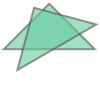

In [45]:
poly1_rot30 = affinity.rotate(poly1,30,origin = "centroid")
geo.GeometryCollection([poly1,poly1_rot30])



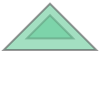

In [46]:
poly1_scale = affinity.scale(poly1,xfact=2.0,yfact=2.0)

geo.GeometryCollection([poly1,poly1_scale])

### 二，geopandas常用操作

geopandas 是pandas在地理数据处理领域的扩展包，主要基于Pandas(普通数据处理), shapely(地理数据分析),fiona(地理数据读取),matplotlib(地理数据可视化)构建而成。 

其核心数据结构是GeoSeries和GeoDataFrame。

其中GeoSeries是pandas中的Series的一个子类，GeoDataFrame是Pandas中的DataFrame的一个子类。

GeoSeries是一列有几何形状(Point,LineString,Polygon,MultiLineString,……)等构成的数据列。

GeoDataFrame由多列Series或者GeoSeries组成，其中至少需要有一列为GeoSeries。

并且需要设置其中的一列GeoSeries为当前活跃状态的GeoSeries，默认的地理数据分析操作都是对活跃状态的GeoSeries进行的。


geopandas 的以下功能非常常用：

* 1，文件读写

* 2，空间查询

* 3，坐标转换

* 4，空间join

* 5，地理数据可视化

In [23]:
#!pip install geopandas rtree mapclassify 

Looking in indexes: http://pypi.sankuai.com/simple


In [6]:
import numpy as np 
import pandas as pd 
import shapely 
import geopandas as gpd 
from shapely import wkt 
from shapely import geometry as geo 
from matplotlib import pyplot as plt 
import rtree 


**1，GeoSeries常用操作**

In [7]:
#1, 创建GeoSeries
gsr_points = gpd.GeoSeries([geo.Point(0.0,0.0),geo.Point(1.0,1.0),geo.Point(2.0,3.0)]) 
print(gsr_points)

0    POINT (0.00000 0.00000)
1    POINT (1.00000 1.00000)
2    POINT (2.00000 3.00000)
dtype: geometry


In [8]:
#2, 常用属性方法
#注：一般来说GeoSeries和空间相关的属性和方法对于GeoDataFrame也是适用的
gsr_polygons = gsr_points.buffer(0.5)
print("area:\n",gsr_polygons.area)
print("length:\n",gsr_polygons.length)
print("total_bounds:\n",gsr_polygons.total_bounds)

print("bounds:\n",gsr_polygons.bounds)
print("centroid:\n",gsr_polygons.centroid)
print("distances:\n",gsr_polygons.distance(geo.Point(0,0)))



area:
 0    0.784137
1    0.784137
2    0.784137
dtype: float64
length:
 0    3.140331
1    3.140331
2    3.140331
dtype: float64
total_bounds:
 [-0.5 -0.5  2.5  3.5]
bounds:
    minx  miny  maxx  maxy
0  -0.5  -0.5   0.5   0.5
1   0.5   0.5   1.5   1.5
2   1.5   2.5   2.5   3.5
centroid:
 0    POINT (-0.00000 -0.00000)
1      POINT (1.00000 1.00000)
2      POINT (2.00000 3.00000)
dtype: geometry
distances:
 0    0.000000
1    0.914214
2    3.105552
dtype: float64


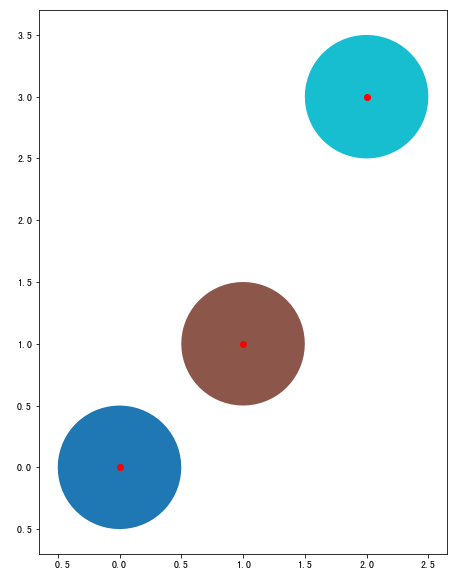

In [9]:
ax = gsr_polygons.plot(figsize = (8,10),cmap = "tab10") 
gsr_points.plot(color = "red",ax = ax)


### 2，GeoDataFrame常用操作

In [10]:
### 1，文件读写

#可以直接读geojson和shp等空间文件，也可以读含有geometry字段的csv文件
dfraw = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#保存成geojson
dfraw.to_file("dfcountries.geojson",driver = "GeoJSON")

#读取geojson
dfload = gpd.read_file("dfcountries.geojson",bbox = [-180,-80,180,80]) #可以用bbox或mask过滤范围


#保存成csv，继承pandas接口
dfload.to_csv("dfcountries.csv",index = False,sep = "\t")


#pandas读取csv,再转成GeoDataFrame
dfcsv = pd.read_csv("dfcountries.csv",sep = "\t")
dfcsv["geometry"] = dfcsv["geometry"].apply(wkt.loads)
df = gpd.GeoDataFrame(dfcsv,geometry = "geometry")


/conda/envs/notebook/lib/python3.6/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [12]:
###2，空间查询

#空间查询可以建立rtree快速找到某个范围内的对象，GeoSeries也具有该
sindex = df.sindex 

#可以调用intersection方法用一个bbox（可以来自geom.bounds）来进行查询
selected_ids = sindex.intersection(np.array([-120,-45,120,45]))

#可以调用query方法用一个geometry来进行查询, 查询关系可以用 predicate指定('intersect','contains','within'等)

query_ids = sindex.query(geo.Polygon.from_bounds(-120,-45,120,45))
print(df.loc[query_ids,:].shape) 

#查看predicate可用的取值参数
print(sindex.valid_query_predicates)


(139, 6)
{'contains', 'touches', 'covers', None, 'crosses', 'contains_properly', 'within', 'overlaps', 'intersects'}


EPSG:4326


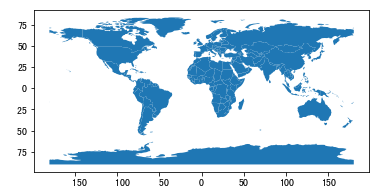

In [13]:
###3，坐标转换

# 设置坐标系
dfwgs = df.set_crs("EPSG:4326") #df.set_crs(epsg=4326)
print(dfwgs.crs)  

dfwgs.plot()

EPSG:3395


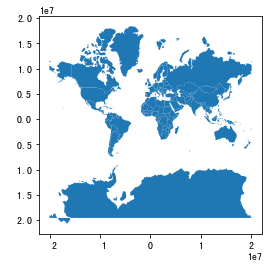

In [14]:
#转换成墨卡托
dfmercator = dfwgs.to_crs("EPSG:3395")
print(dfmercator.crs)
dfmercator.plot() 

In [15]:
### 4,空间join

#空间join实际上是利用空间索引实现的。
#两个GeoDataFrame通过几何之间的‘intersects’,‘contains’,'crosses'等关系可以建立配对关系，从而确定join逻辑。
#join的类型可以是left,right或者inner 


In [16]:
dfcountries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
dfcities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
dfjoin = gpd.sjoin(dfcities,dfcountries,op= 'intersects',how = "left")


In [17]:
### 5,可视化

#利用GeoDataFrame可以像DataFrame那样方便地调用plot函数进行可视化操作。
#和DataFrame的plot函数相比，GeoDataFrame的plot函数的kind参数在"line","bar"等基础上增加了"geo”类型的绘图类别。

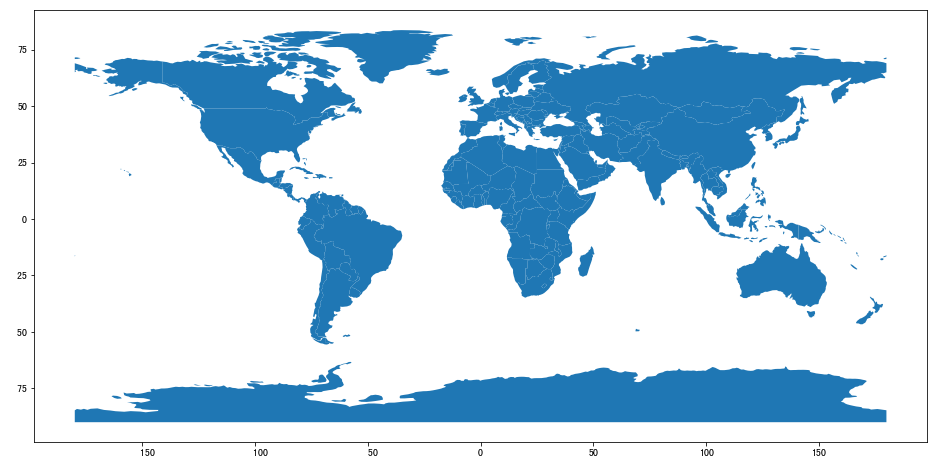

In [18]:
%matplotlib inline 
%config InlineBackend.figure_format = 'png'
from matplotlib import pyplot as plt 

df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#绘制简单形状
df.plot(kind="geo",figsize = (16,13)) 

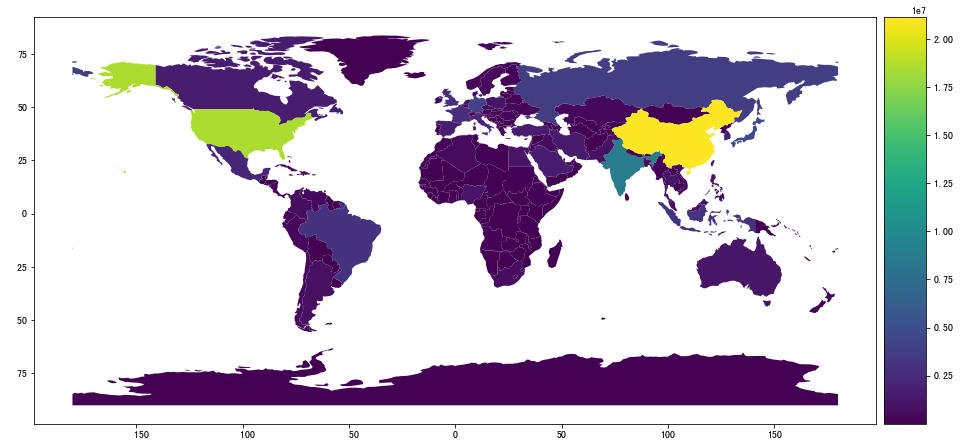

In [19]:
#绘制属性
%matplotlib inline 
%config InlineBackend.figure_format = 'png'

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1,figsize = (16,13))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df.plot(kind="geo",column = "gdp_md_est",legend=True,ax = ax,cax = cax  ) 


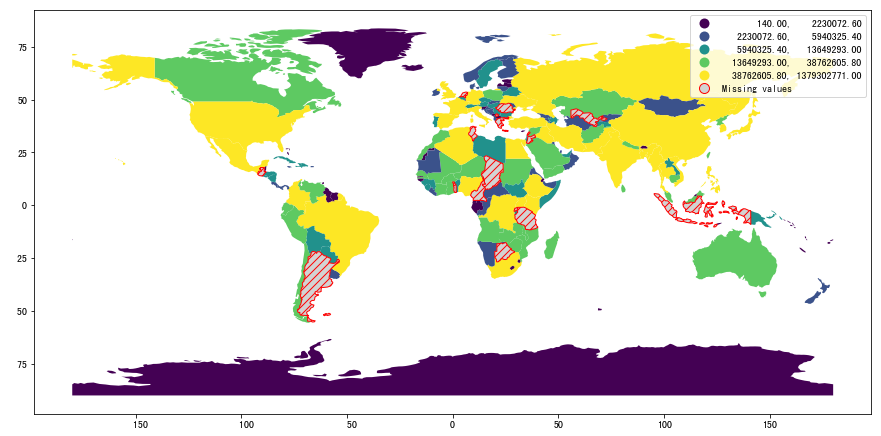

In [27]:
#属性图考虑缺失值
df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df.loc[np.random.choice(df.index, 20), 'pop_est'] = np.nan 
df.plot(column="pop_est",figsize=(15, 10),scheme = 'Quantiles',legend=True,
        missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"} ) 

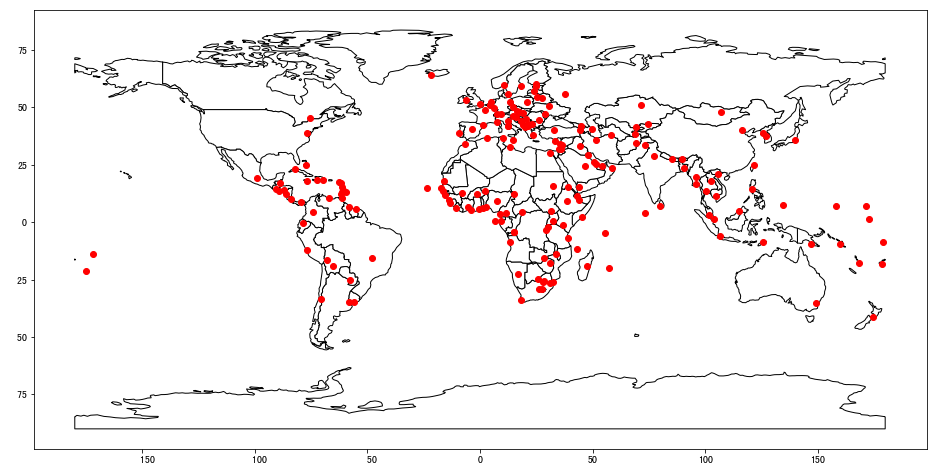

In [28]:
#多图叠加
dfcoutries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = dfcoutries.plot(kind="geo",figsize = (16,13),color='white', edgecolor='black') 
dfcities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
dfcities.plot(color = "red",ax = ax)

### 三，坐标系变换

**1，坐标系介绍**

地理坐标系通常分为经纬度坐标系和投影坐标系两种。

最常用的经纬度坐标系叫做WGS84国际坐标系(代号为EPSG:4326)。谷歌等国外地图机构通常用的都是WGS84坐标系存储地理数据。

国内的国测局为了保密的原因，在WGS84坐标系上加了一个非线性坐标偏移加密，叫做GCJ02坐标系，俗称"火星坐标系"。国内除了百度以外的高德、腾讯等机构都是使用的GCJ09坐标系。

百度地图在GCJ02坐标系上又加了一个偏移加密，叫做BD09坐标系。国内只有百度地图在使用BD09坐标系。

经纬度坐标系之间的转换可以借助coord-convert这个库实现。

投影坐标系最常用的是Web-Mercator(代号为EPSG:3857)坐标系。Mercator一般用来显示使用，它具有保角特性，但在高纬度地区有放大效果。

此外，国内如果要较为精确地计算距离和角度，一般会使用(代号为EPSG:3415)国内平面坐标系。这个平面坐标系也是一种投影坐标系。

经纬度坐标系和投影坐标系之间的转换可以用pyproj这个库实现。

如果要对LineString，Polygon等几何对象逐点实施坐标转换，可以使用shapely.ops.transform 来调用坐标转换函数。


**2，范例代码**

In [31]:
#!pip install coord_convert 

In [32]:
from pyproj import Transformer 
from coord_convert.transform import wgs2gcj, wgs2bd, gcj2wgs, gcj2bd, bd2wgs, bd2gcj 
from shapely import ops 
from shapely.geometry import LineString,Point,Polygon 

#经纬度转国内平面
def lngLatToPlanar(lng,lat):
    transformer = Transformer.from_crs("EPSG:4326","EPSG:3415",always_xy=True)  
    x,y = transformer.transform(lng,lat)
    return x,y

#国内平面转经纬度
def planarToLngLat(x,y):
    transformer = Transformer.from_crs("EPSG:3415","EPSG:4326",always_xy=True)  
    lng,lat = transformer.transform(x,y)
    return lng,lat  #round(lng,6),round(lat,6)

#墨卡托坐标系转经纬度
def mercatorToLngLat(x,y):
    transformer = Transformer.from_crs("EPSG:3857","EPSG:4326",always_xy=True)
    lng,lat = transformer.transform(x,y)
    return lng,lat  #round(lng,6),round(lat,6)

#经纬度转墨卡托坐标
def lngLatToMercator(lng,lat):
    transformer = Transformer.from_crs("EPSG:4326","EPSG:3857",always_xy=True)  
    x,y = transformer.transform(lng,lat)
    return x,y


#经纬度和国内平面互转
line_lnglat = LineString([(116.38,40.04),(116.40,40.10),(116.41,40.12)])
line_planar = ops.transform(lngLatToPlanar, line_lnglat)
line_lnglat_back =  ops.transform(planarToLngLat, line_planar)
print("line_lnglat:",line_lnglat)
print("line_planar:",line_planar)
print("line_lnglat_back:",line_lnglat_back,"\n")


#WGS84和GCJ02坐标系互转
line_wgs84 = LineString([(116.40,40.14),(116.42,40.15),(116.43,40.13)])
line_gcj02 = ops.transform(wgs2gcj, line_wgs84)
line_wgs84_back =  ops.transform(gcj2wgs, line_gcj02)
print("line_wgs84:",line_wgs84)
print("line_gcj02:",line_gcj02)
print("line_wgs84_back:",line_wgs84_back)


line_lnglat: LINESTRING (116.38 40.04, 116.4 40.1, 116.41 40.12)
line_planar: LINESTRING (715076.6066109239 2650731.49247462, 716778.0441862883 2657814.397580099, 717645.8244277409 2660180.573489216)
line_lnglat_back: LINESTRING (116.38 40.03999999956594, 116.4 40.09999999956577, 116.41 40.11999999956568) 

line_wgs84: LINESTRING (116.4 40.14, 116.42 40.15, 116.43 40.13)
line_gcj02: LINESTRING (116.4062735375936 40.14141679078853, 116.426264812149 40.15141118292108, 116.4362487380191 40.13139916717333)
line_wgs84_back: LINESTRING (116.3999999999657 40.13999999993943, 116.4200000000072 40.15000000000523, 116.4300000000259 40.13000000001951)


**3，脚本工具**

pip install coord-convert

安装了 coord_covert 库后，可以用命令行直接对shp、geojson等文件进行WGS84和GCJ02坐标系的转换。

范例如下：

~/temp > coord_covert gcj2wgs polyline_gcj.geojson polyline_wgs.geojson 100%██████████████████████████████████████████████████████| 219/219 [00:00<00:00, 550.93it/s]